In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, convolve, medfilt, firwin

Plotting the signals in time domain

<Figure size 1200x800 with 0 Axes>

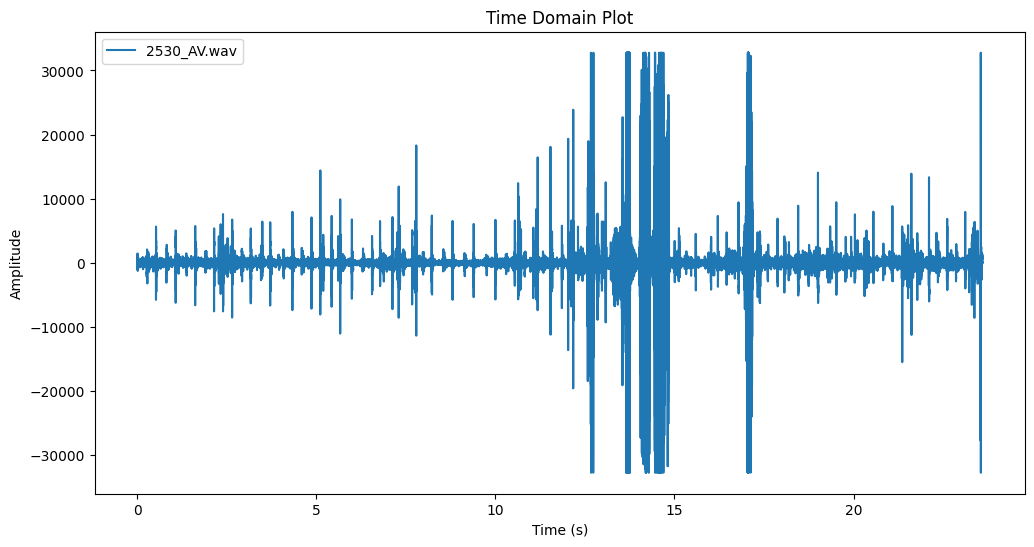

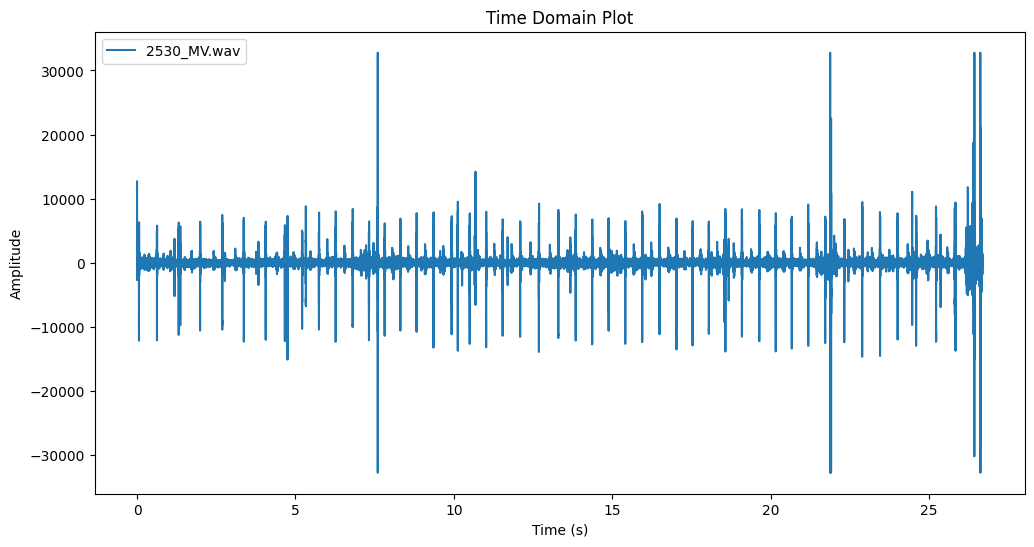

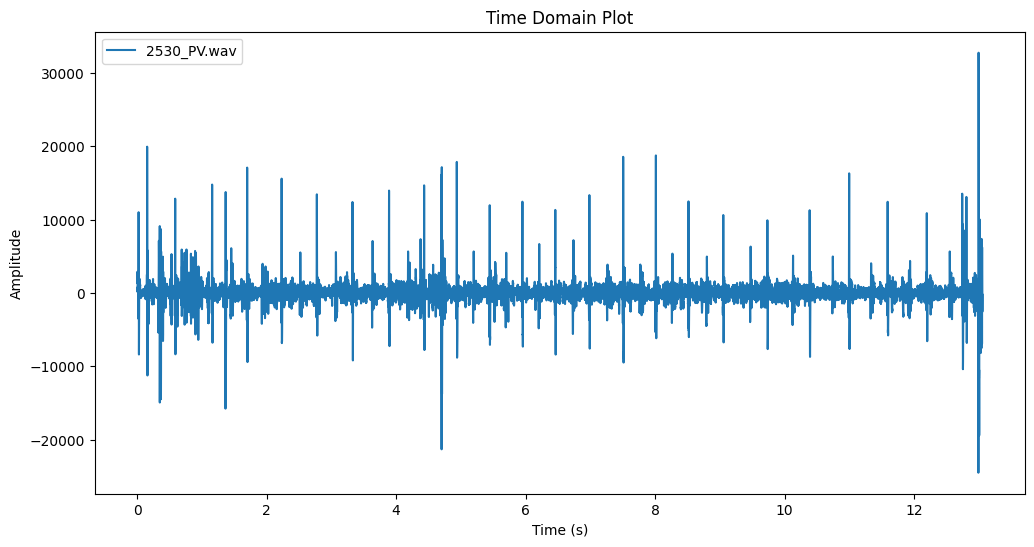

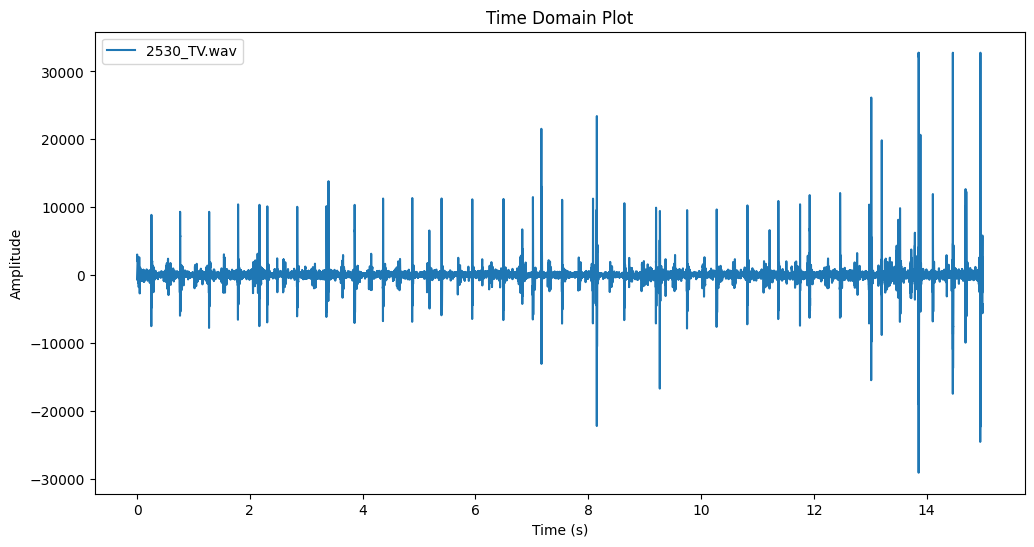

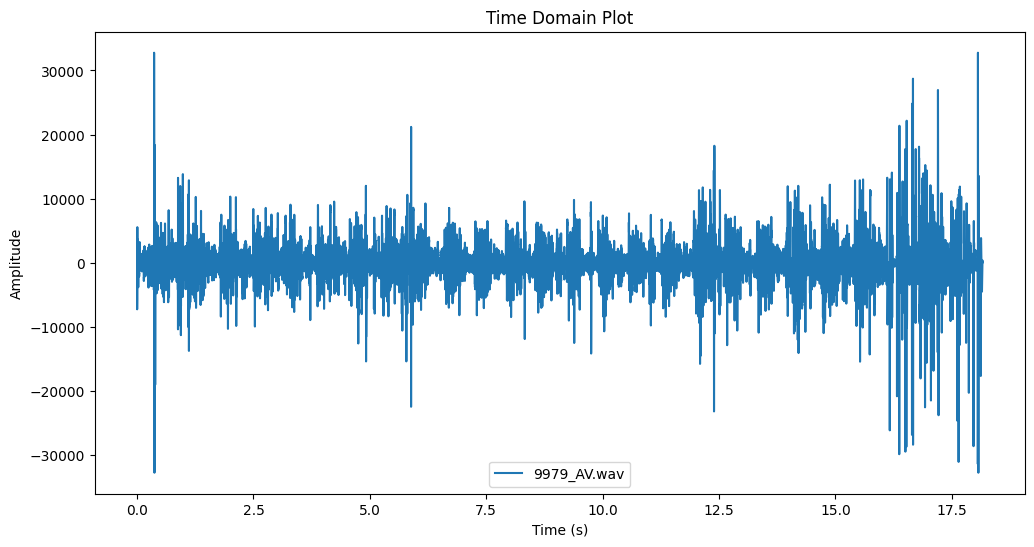

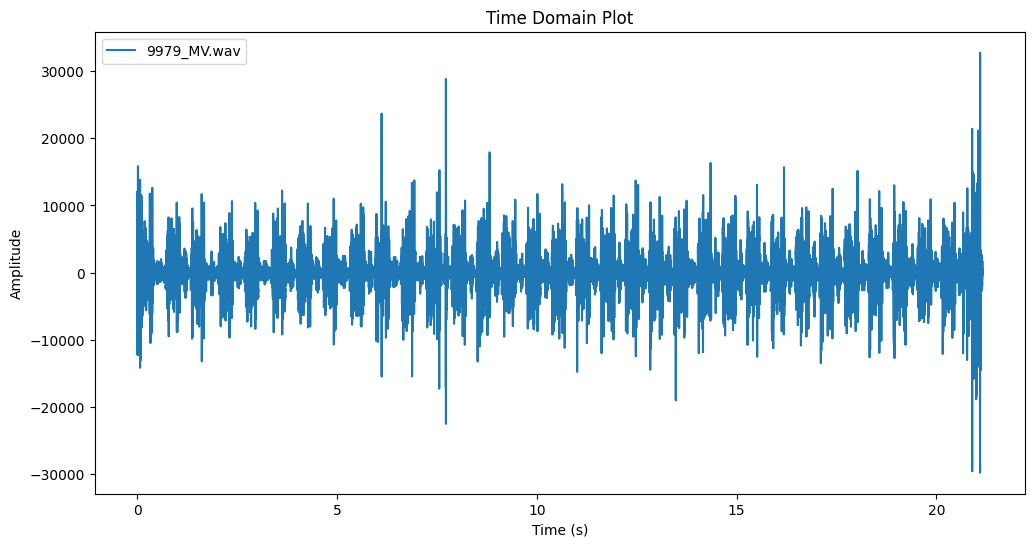

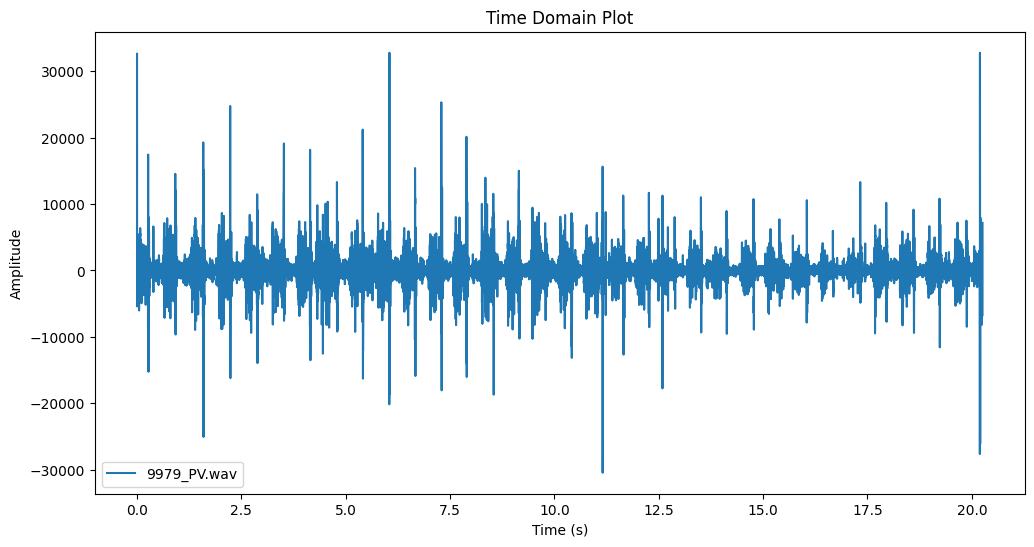

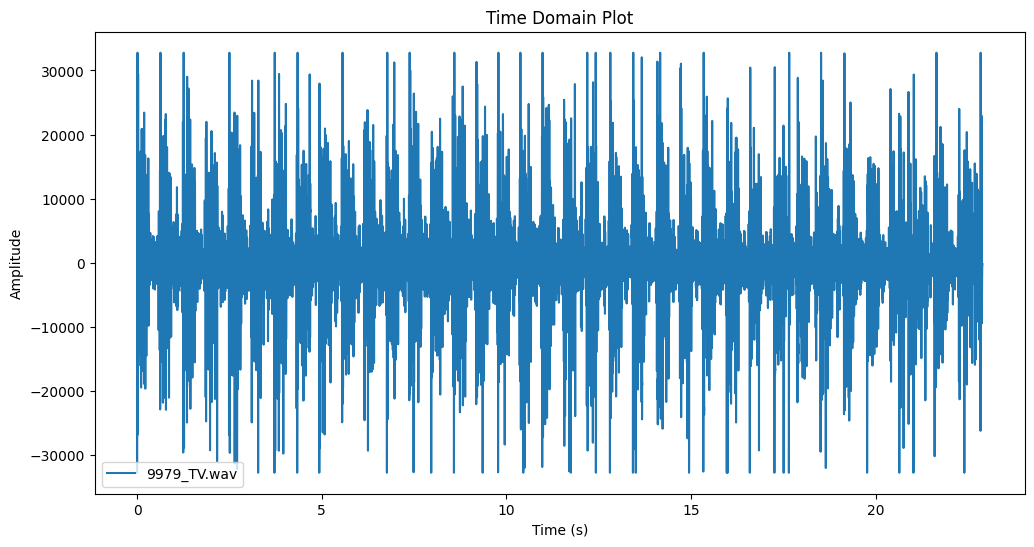

In [2]:
def plot_wav_files(directory):
    plt.figure(figsize=(12, 8))
    for file_name in os.listdir(directory):
        if file_name.endswith(".wav"):
            file_path = os.path.join(directory, file_name)
            with wave.open(file_path, 'rb') as wav_file:
                frames = wav_file.readframes(-1)
                signal = np.frombuffer(frames, dtype='int16')
                sample_rate = wav_file.getframerate()
                time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
                plt.figure(figsize=(12, 6))
                plt.plot(time, signal, label=file_name)
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Time Domain Plot')
                plt.legend()
                plt.show()

directory = "F:\\RME\\4Y1S\\DSP Lab\\FIR FILTER LAB\\pcg\\9979_PV"
plot_wav_files(directory)

Plotting in Frequency Domain and the spectrogram


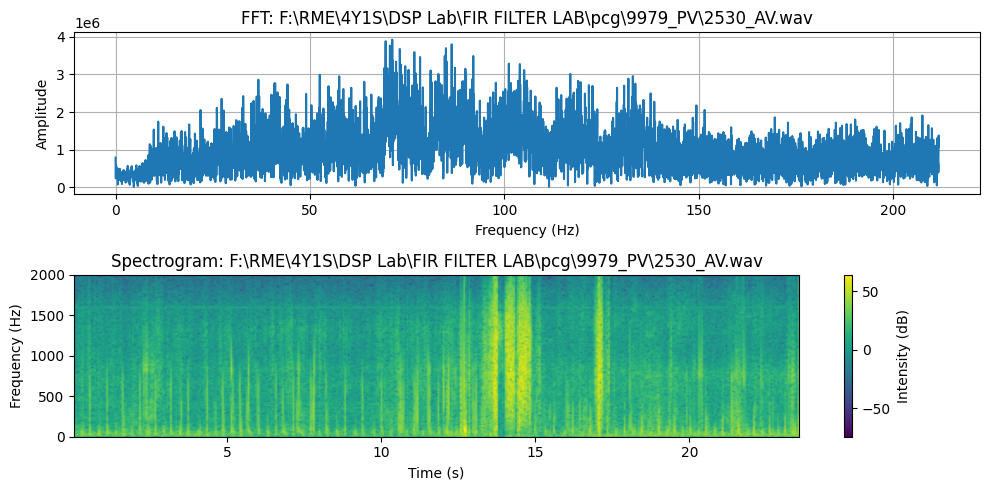

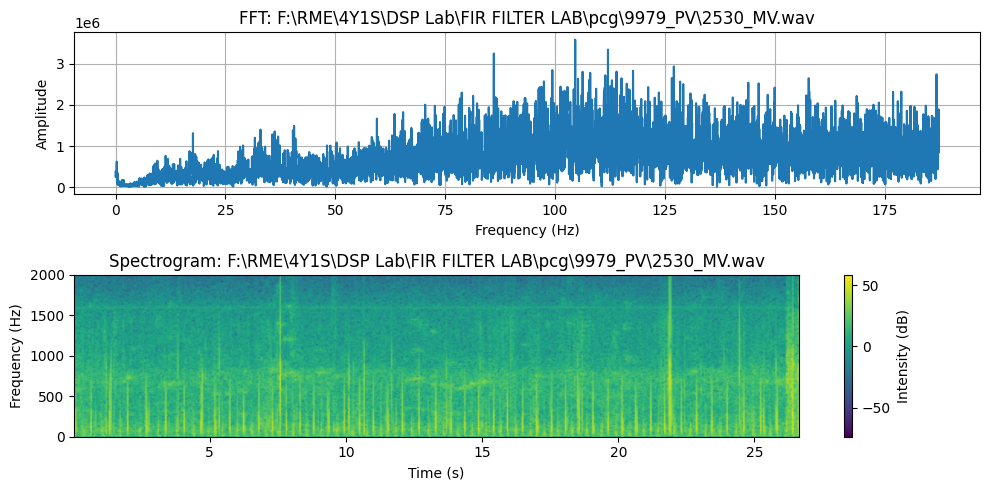

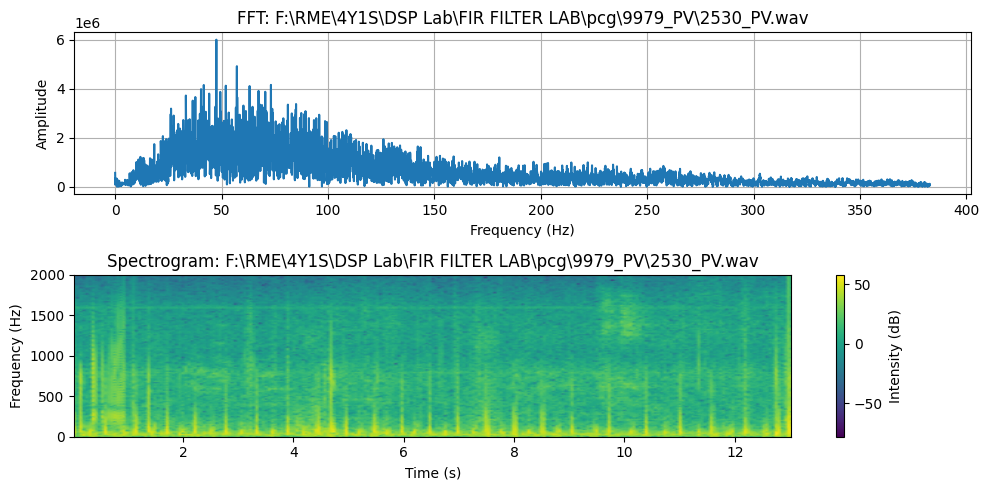

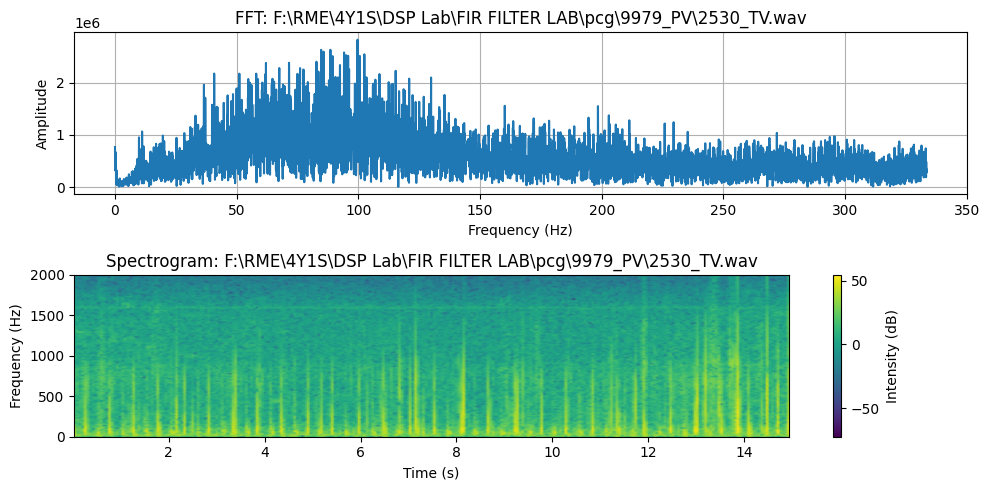

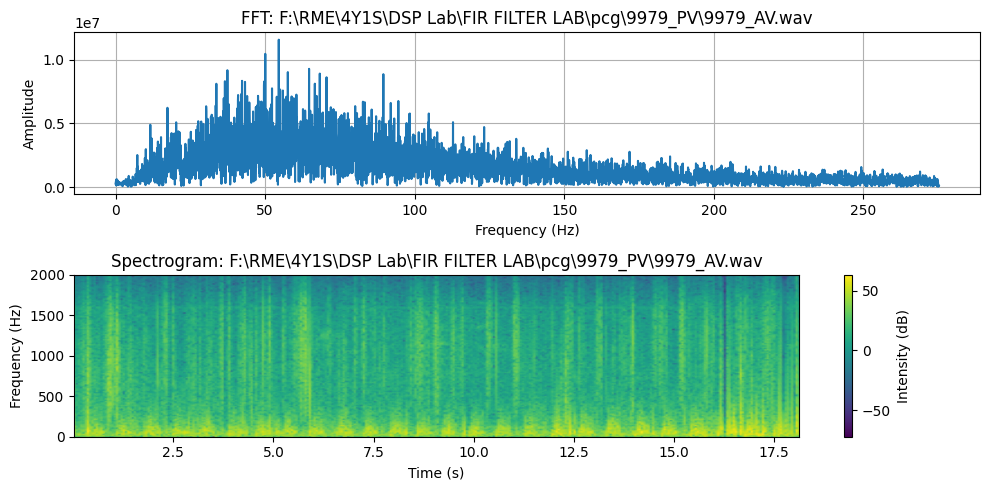

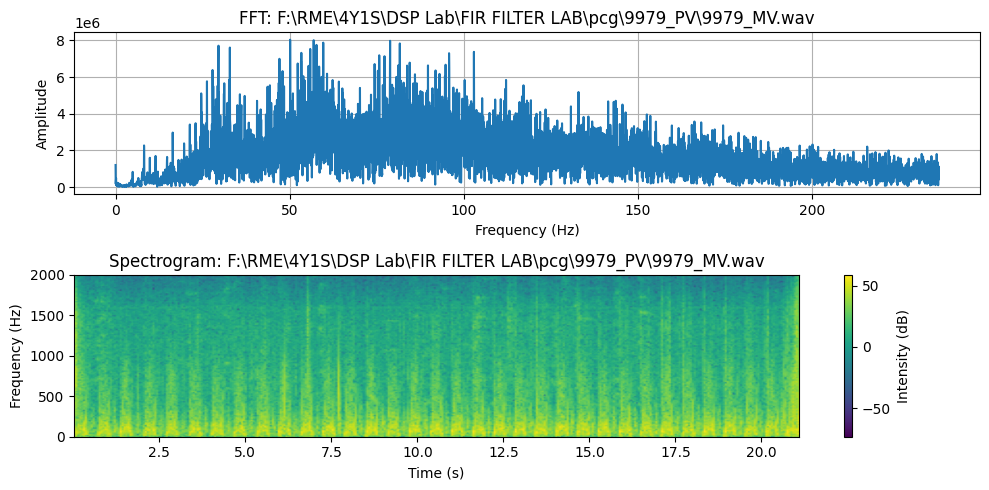

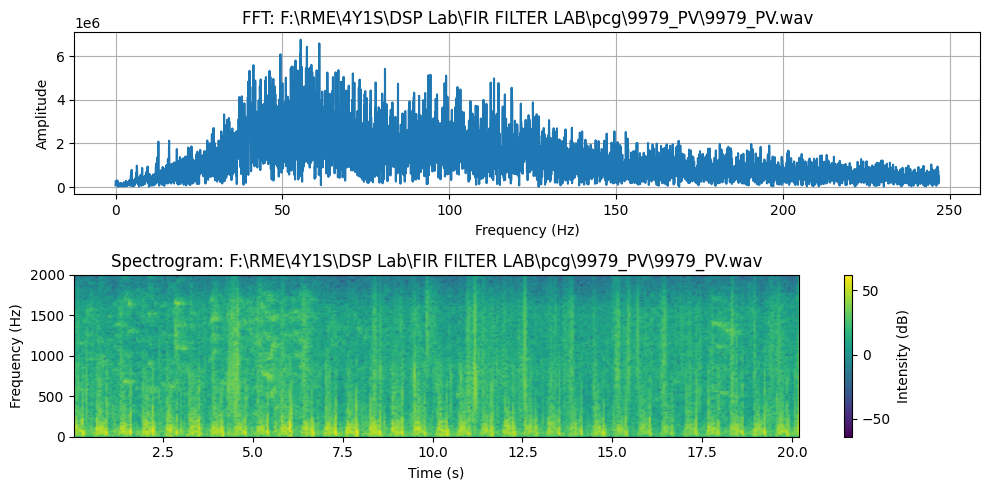

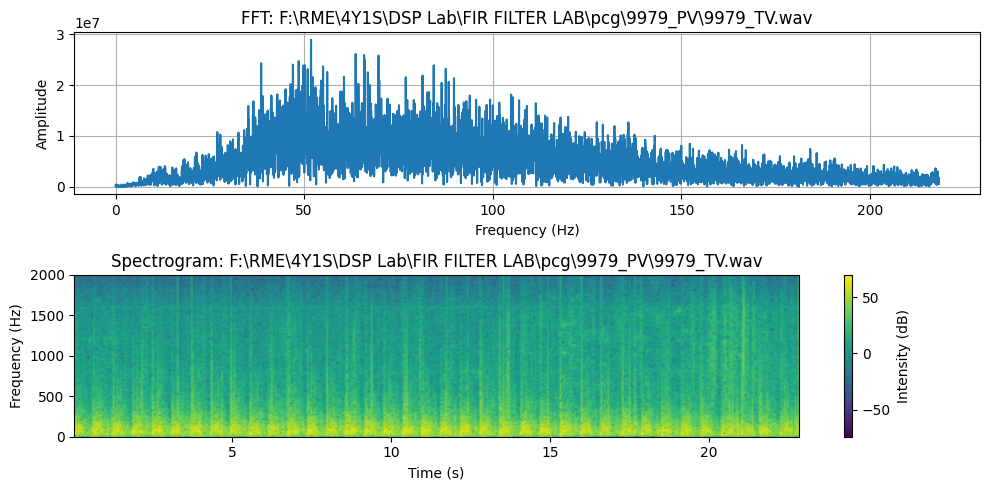

In [4]:

def plot_fft_spectrogram(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        frames = wav_file.readframes(-1)
        signal = np.frombuffer(frames, dtype='int16')
        sample_rate = wav_file.getframerate()
        time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
        
        # Perform FFT
        fft_signal = fft(signal)
        freqs = fftfreq(len(signal), 1/sample_rate)
        
        # Plot the FFT
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(abs(freqs)[:5000], np.abs(fft_signal)[:5000])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.title('FFT: ' + file_path)
        plt.grid(True)
        
        # Plot the spectrogram
        plt.subplot(2, 1, 2)
        f, t, Sxx = spectrogram(signal, fs=sample_rate)
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.colorbar(label='Intensity (dB)')
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.title('Spectrogram: ' + file_path)
        
        plt.tight_layout()
        plt.show()

for file_name in os.listdir(directory):
    if file_name.endswith(".wav"):
        file_path = os.path.join(directory, file_name)
        plot_fft_spectrogram(file_path)

Butterworth Filter 

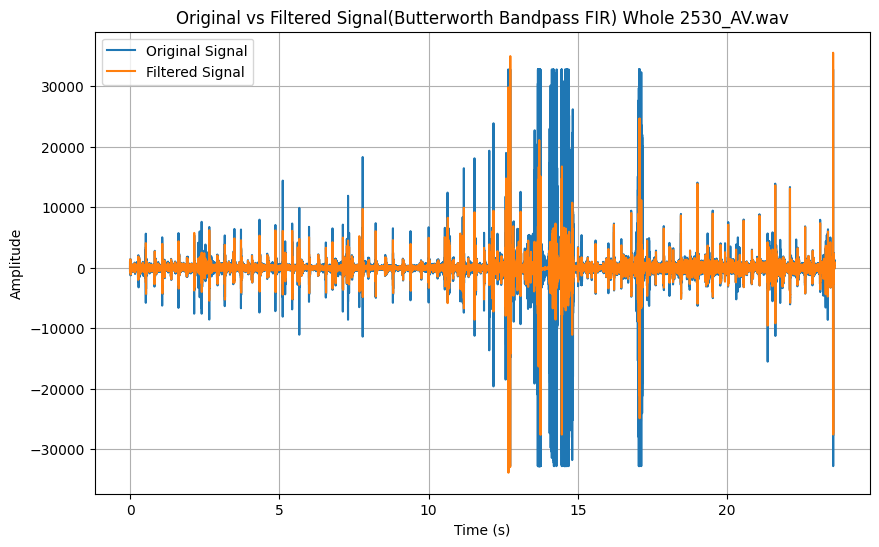

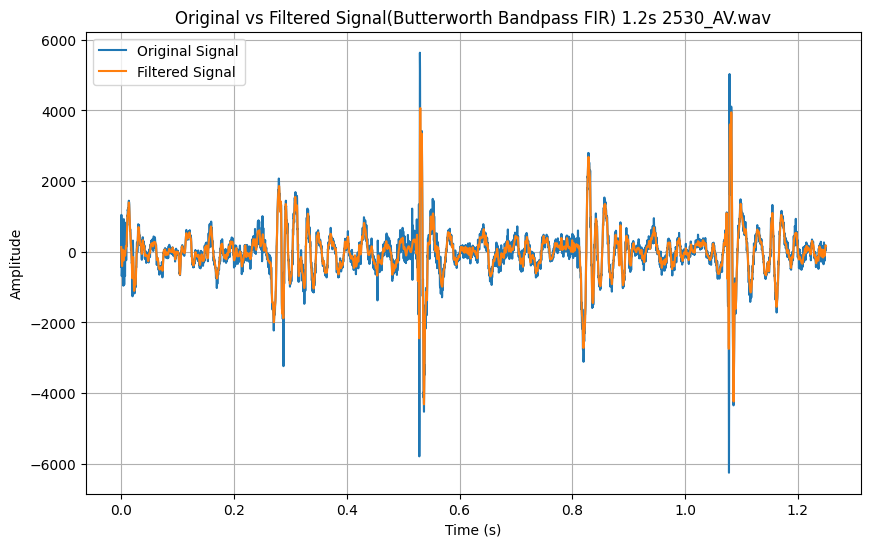

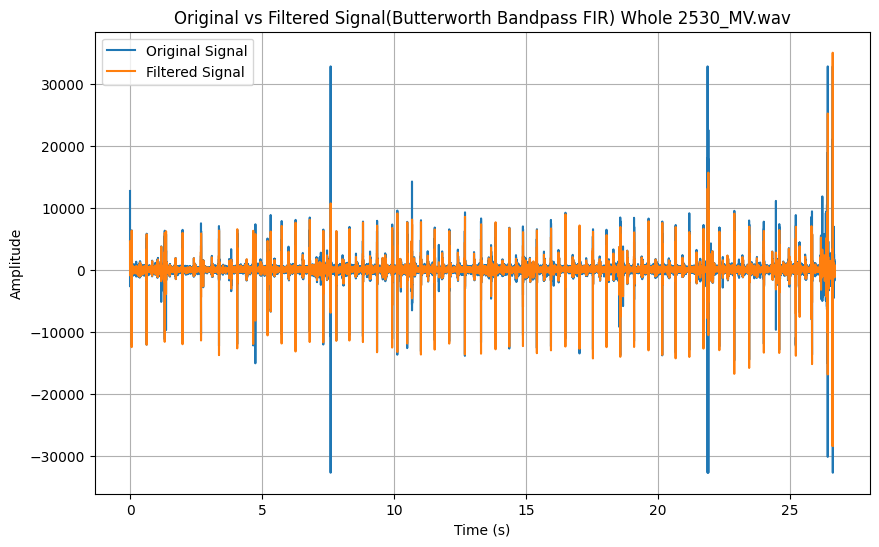

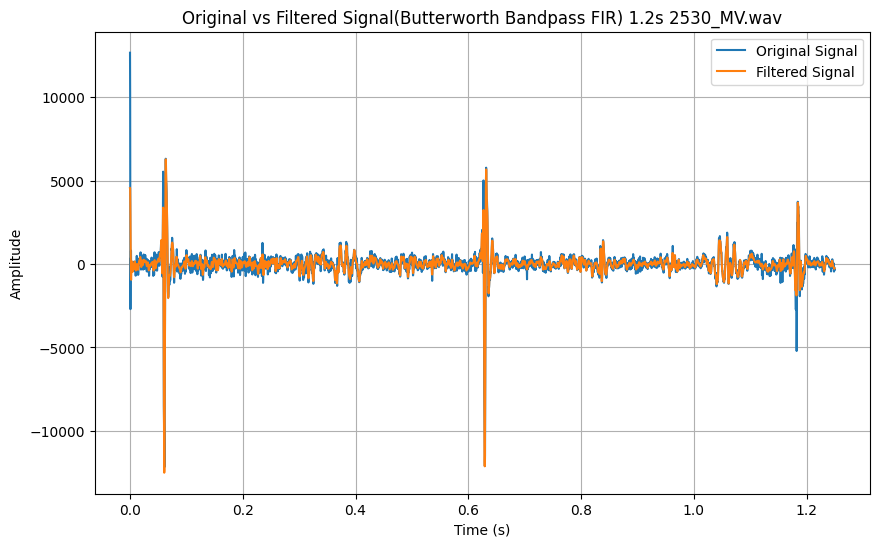

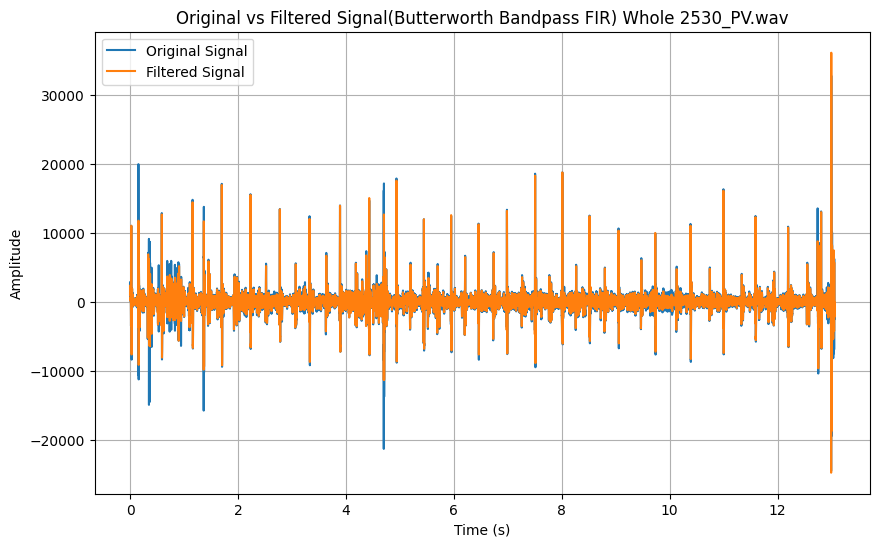

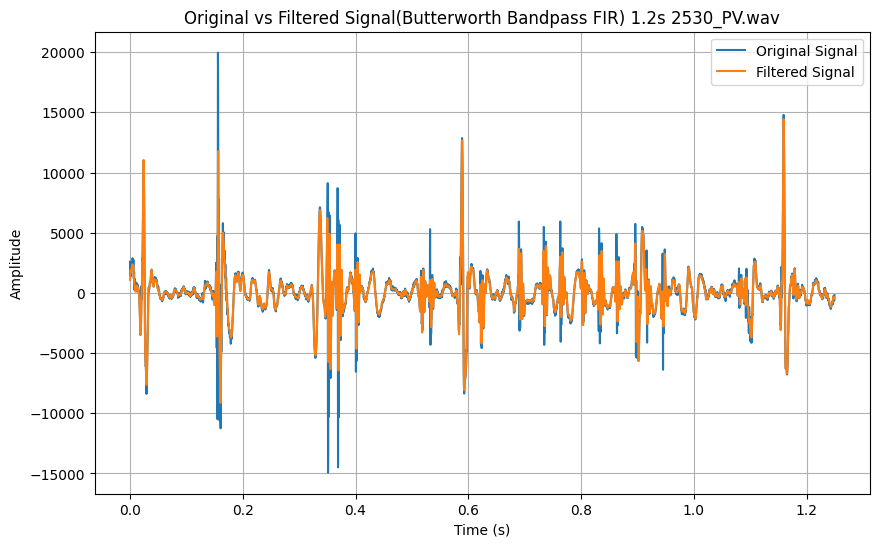

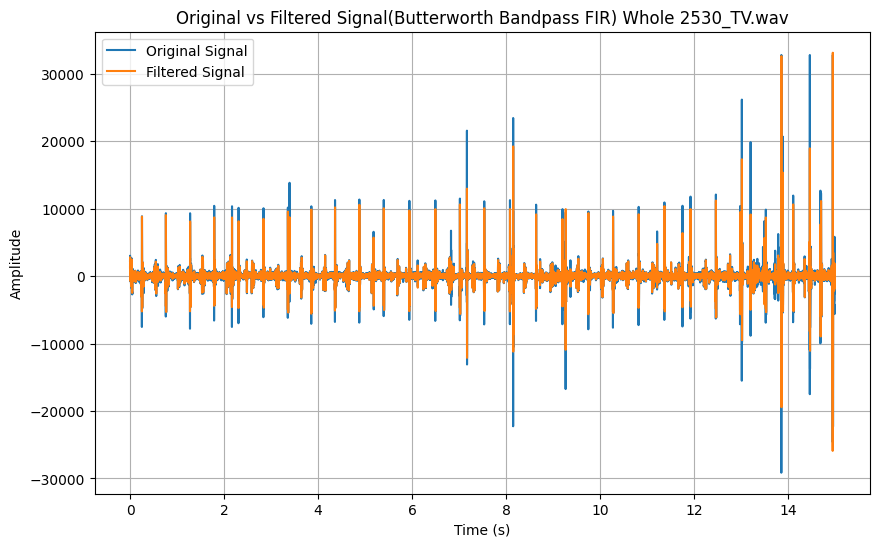

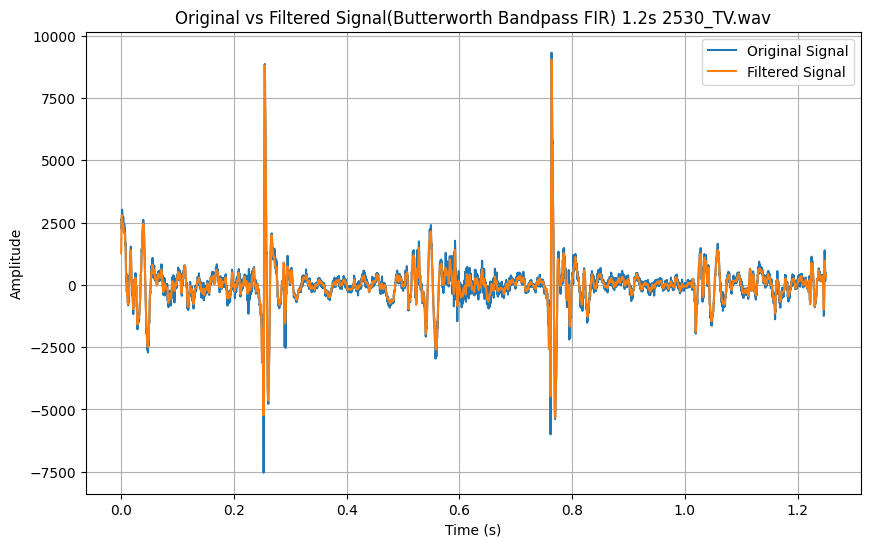

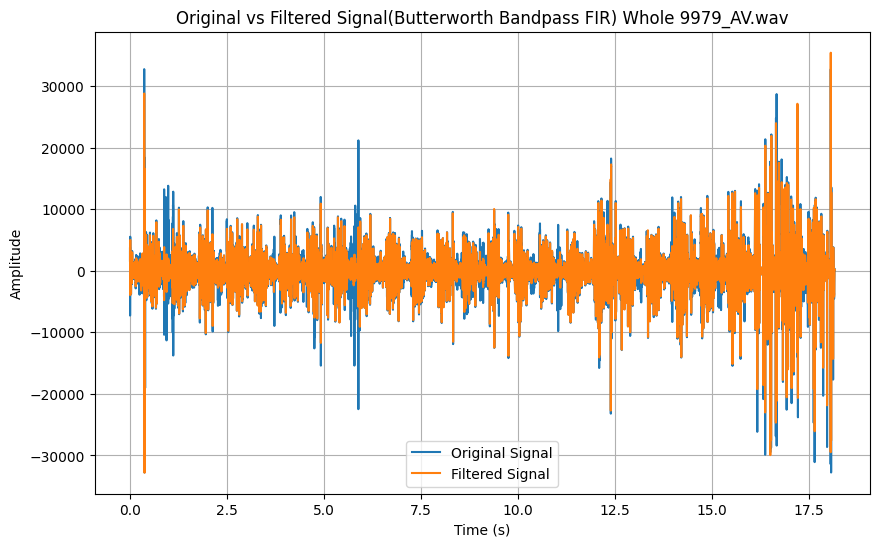

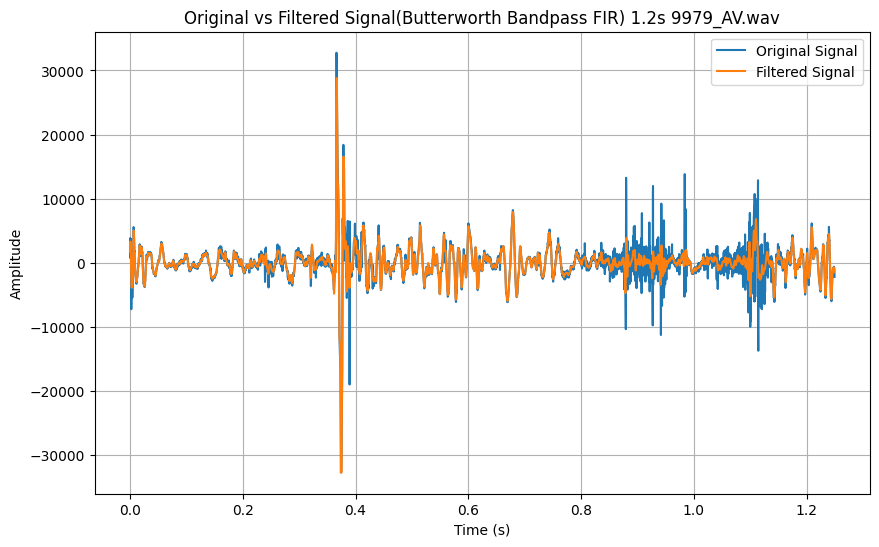

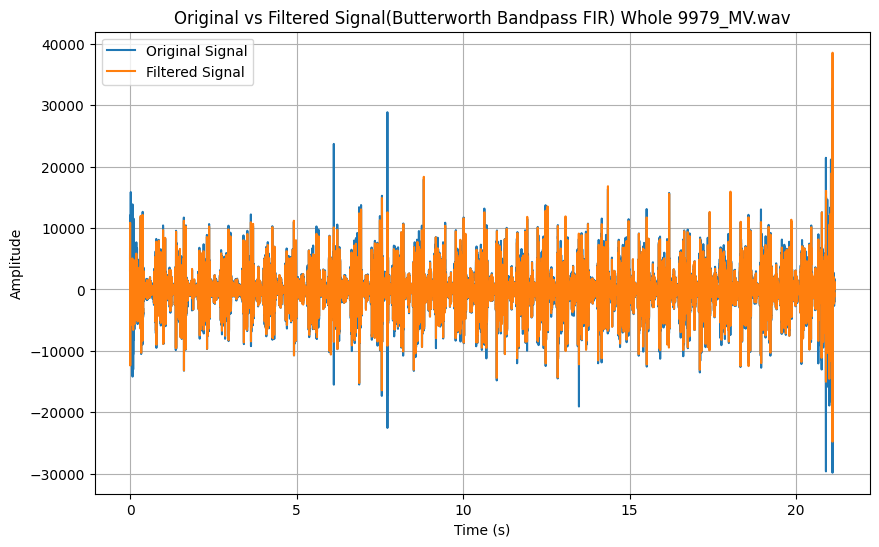

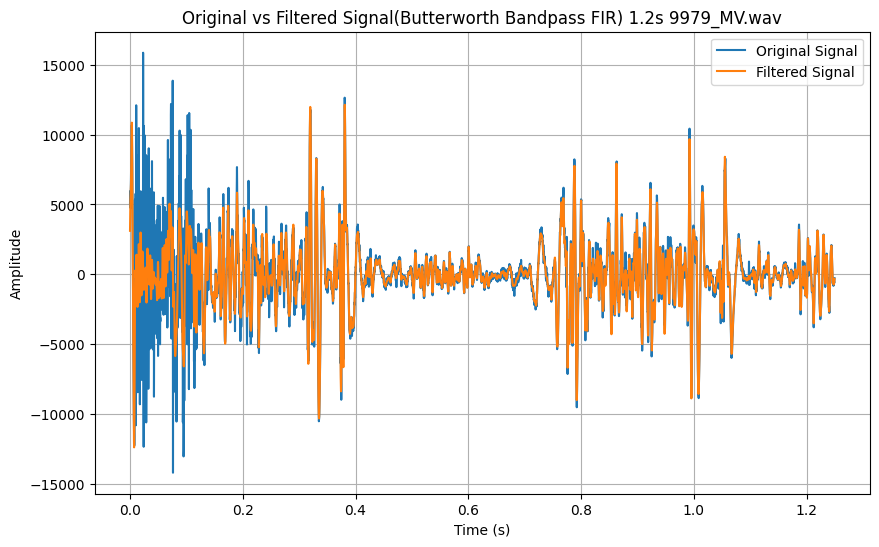

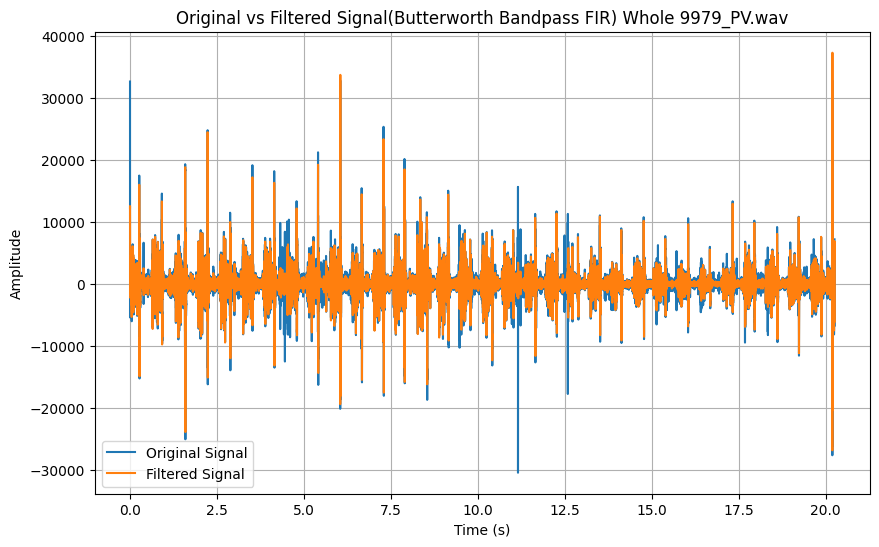

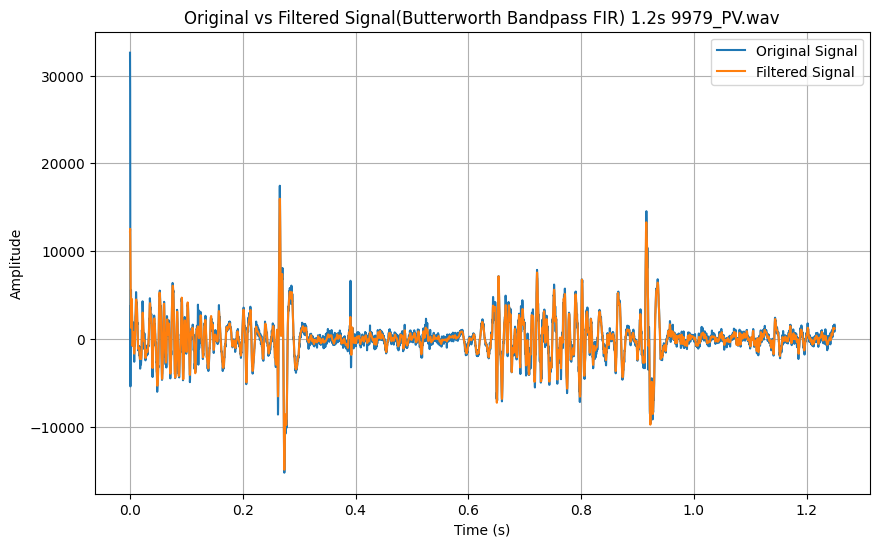

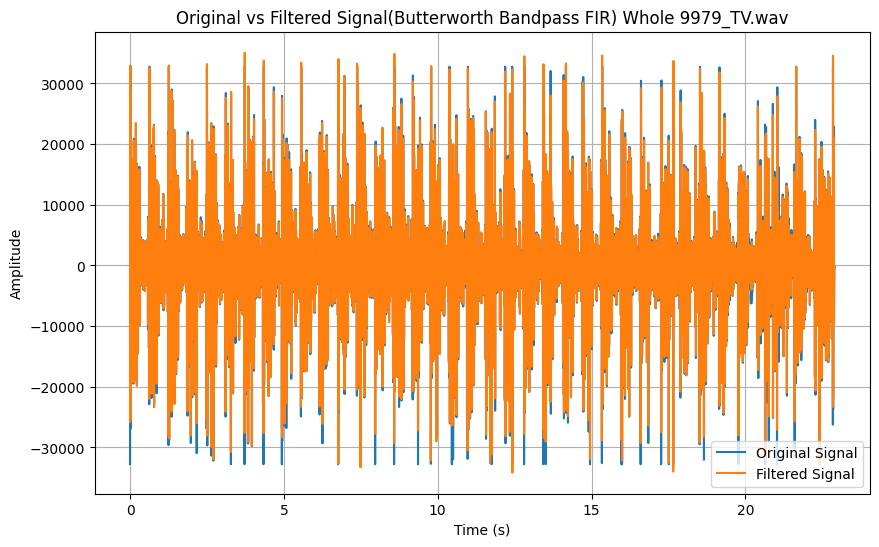

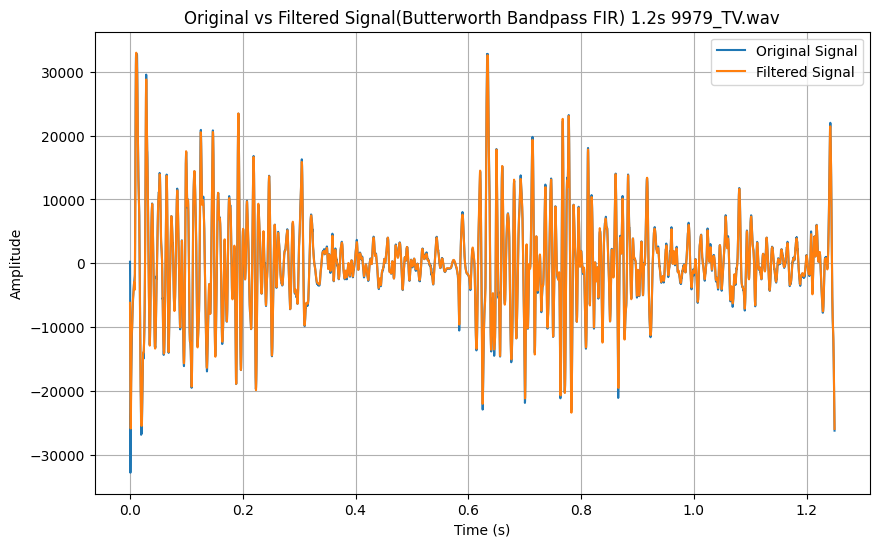

In [5]:
def butter_fir_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    taps = firwin(order+1, [low, high], pass_zero=False)
    return taps

# Apply FIR filter to the signal using convolution
def apply_fir_filter(signal, taps):
    filtered_signal = convolve(signal, taps, mode='same')
    return filtered_signal
    
lowcut = 4  # Lower cutoff frequency (Hz)
highcut = 400  # Higher cutoff frequency (Hz)
order = 100  # Filter order


for file_name in os.listdir(directory):
        if file_name.endswith(".wav"):
            file_path = os.path.join(directory, file_name)
            with wave.open(file_path, 'rb') as wav_file:
                frames = wav_file.readframes(-1)
                signal = np.frombuffer(frames, dtype='int16')
                sample_rate = wav_file.getframerate()
                taps = butter_fir_bandpass(lowcut, highcut, sample_rate, order)
                filtered_signal = apply_fir_filter(signal, taps)
                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal)) / sample_rate, signal, label='Original Signal')
                plt.plot(np.arange(len(filtered_signal)) / sample_rate, filtered_signal, label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal(Butterworth Bandpass FIR) Whole '+ file_name)
                plt.legend()
                plt.grid(True)
                plt.show()

                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal))[:5000] / sample_rate, signal[:5000], label='Original Signal')
                plt.plot(np.arange(len(filtered_signal))[:5000] / sample_rate, filtered_signal[:5000], label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal(Butterworth Bandpass FIR) 1.2s '+ file_name)
                plt.legend()
                plt.grid(True)
                plt.show()

Chebyshev Bandpass 

c:\Users\User\miniconda3\lib\site-packages\scipy\signal\windows\_windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


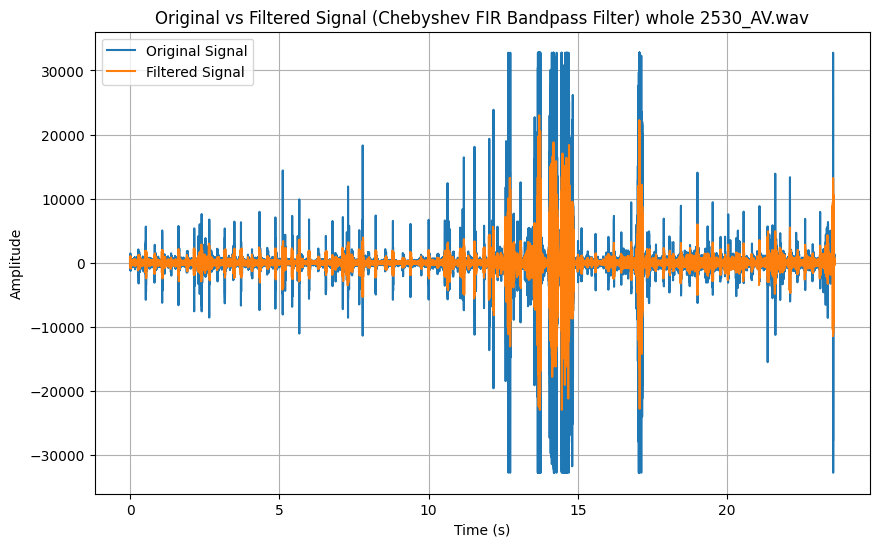

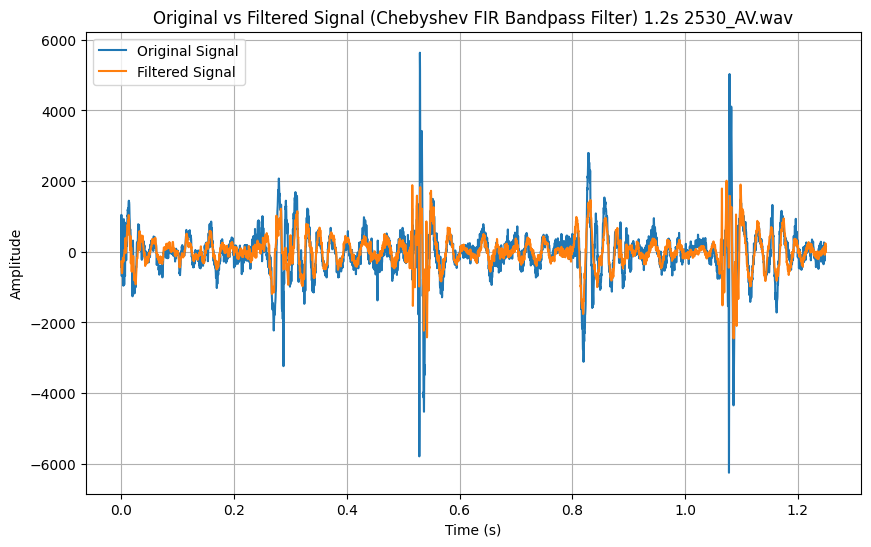

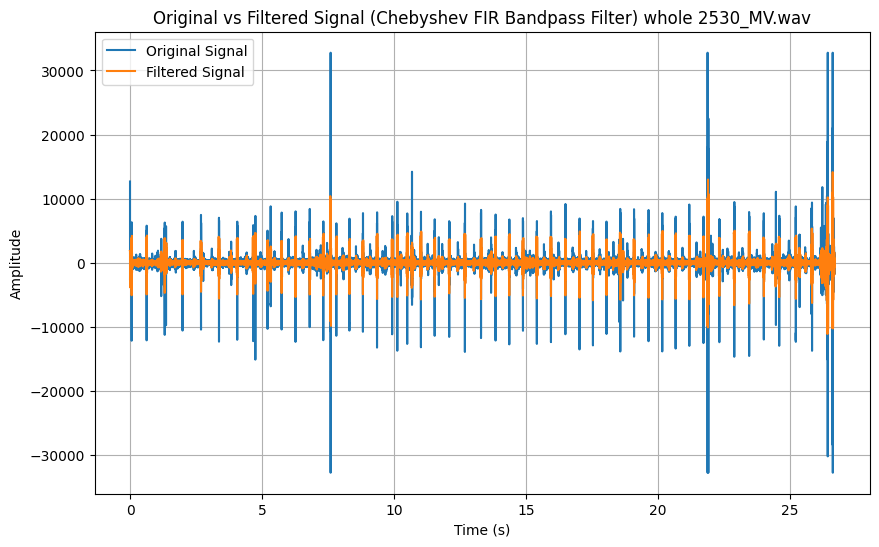

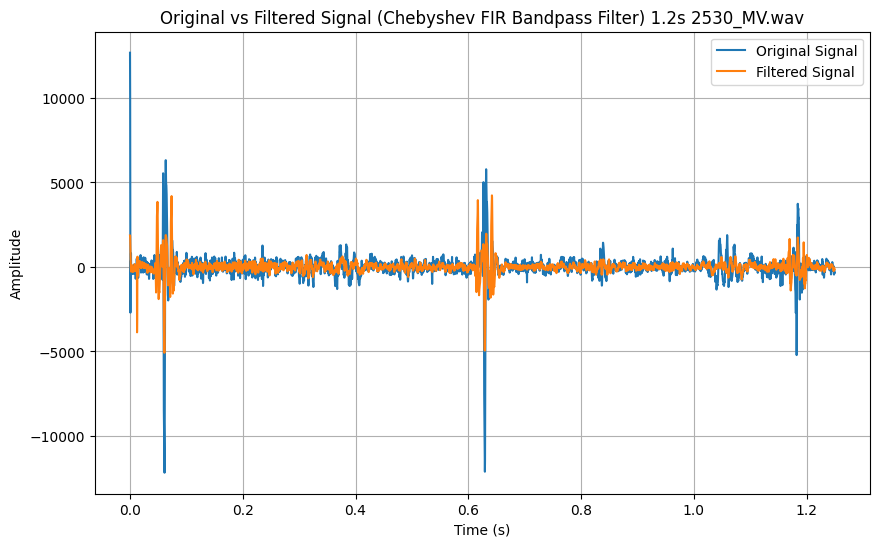

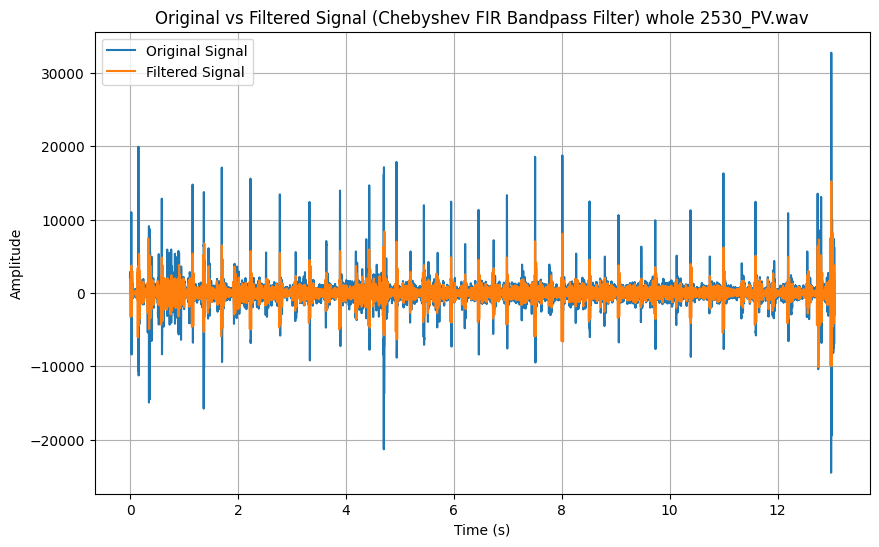

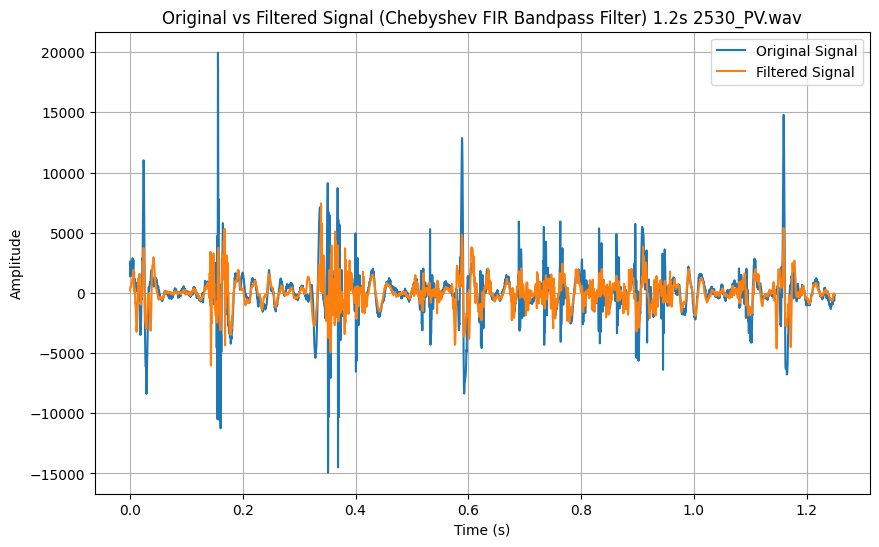

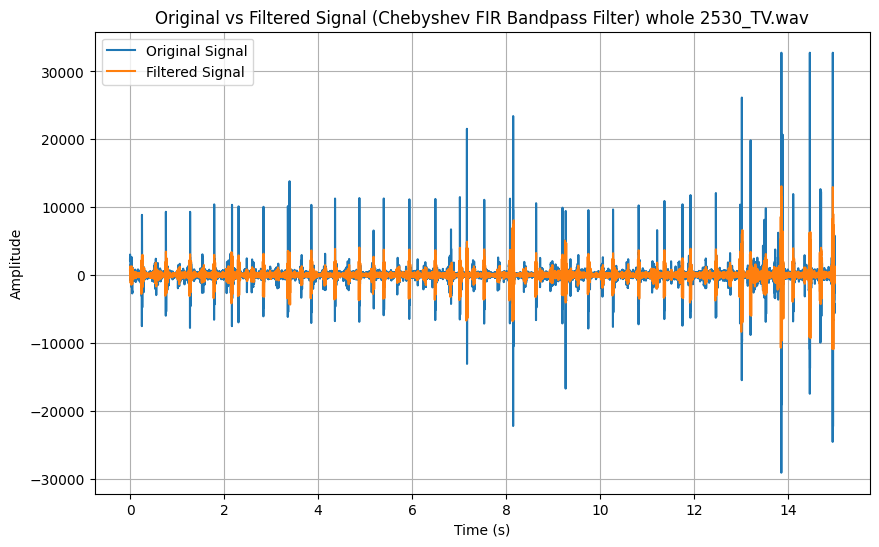

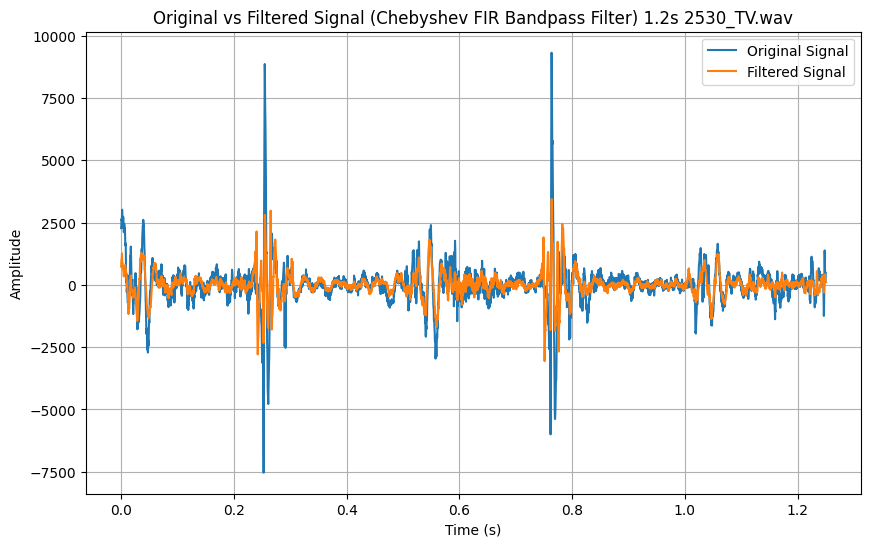

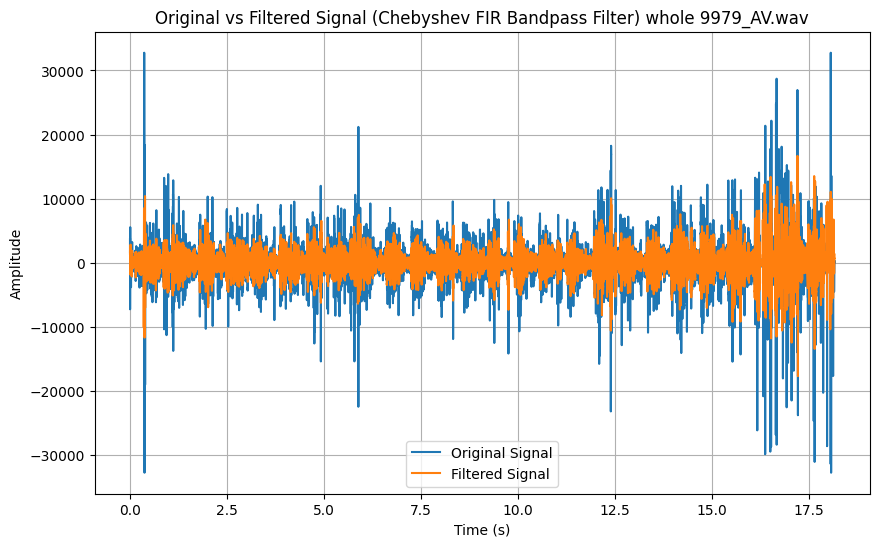

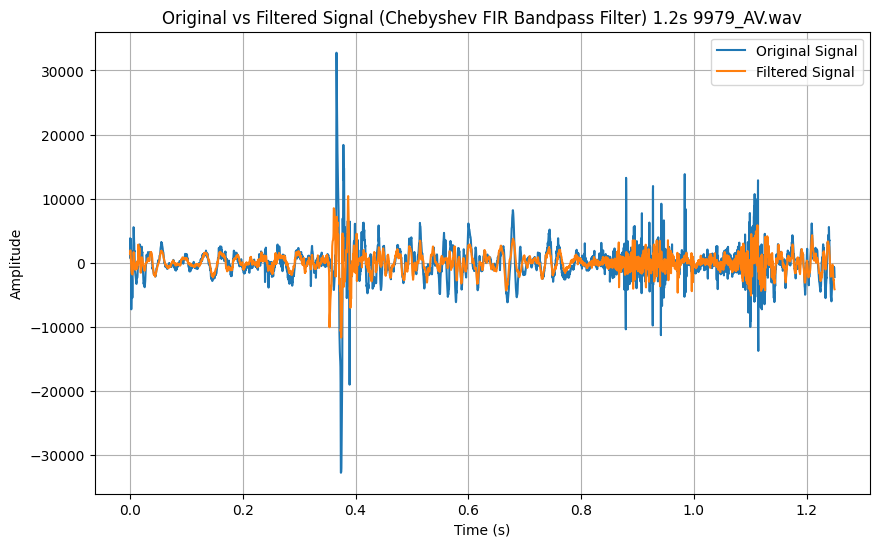

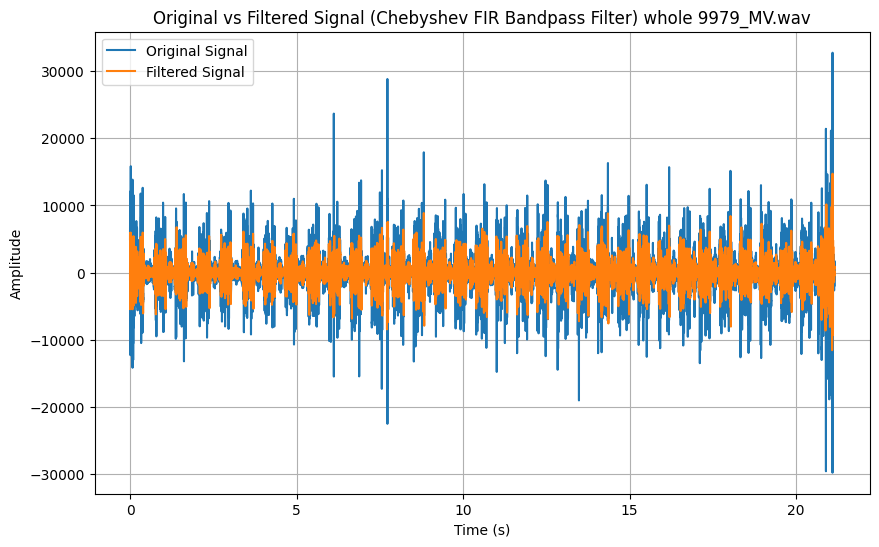

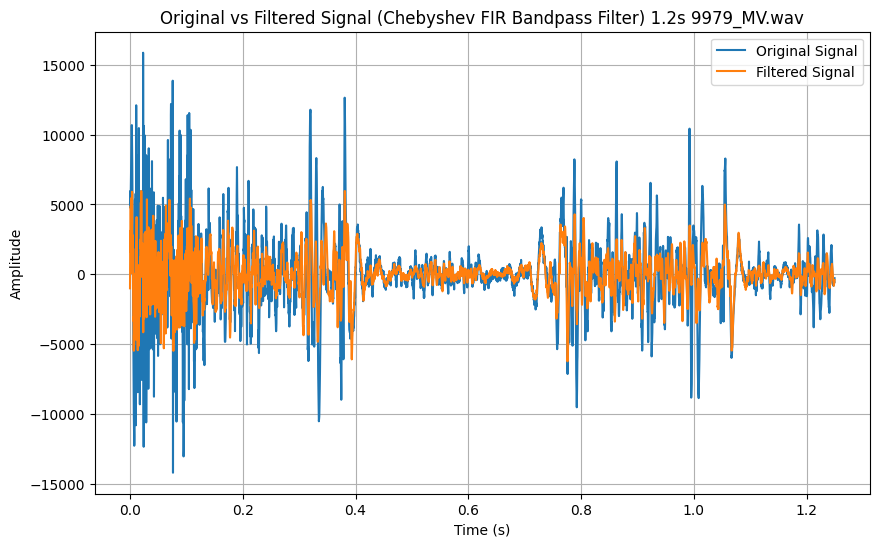

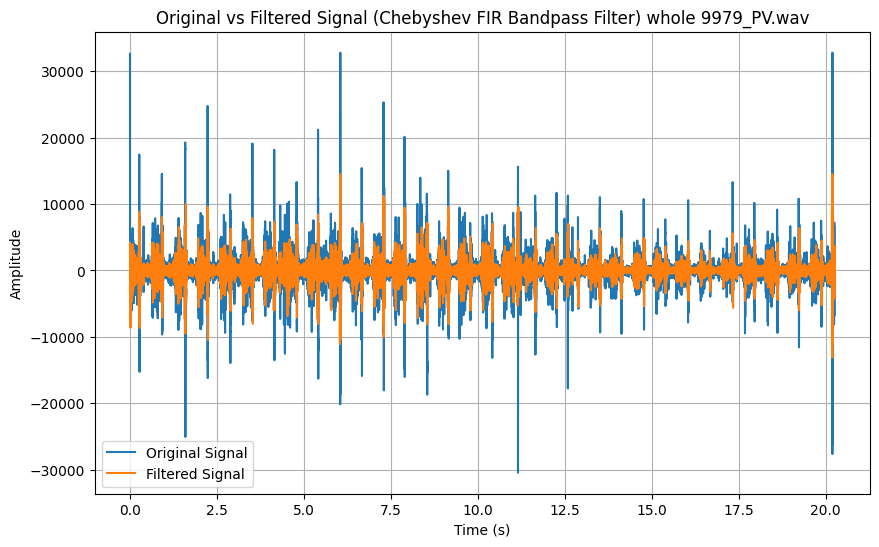

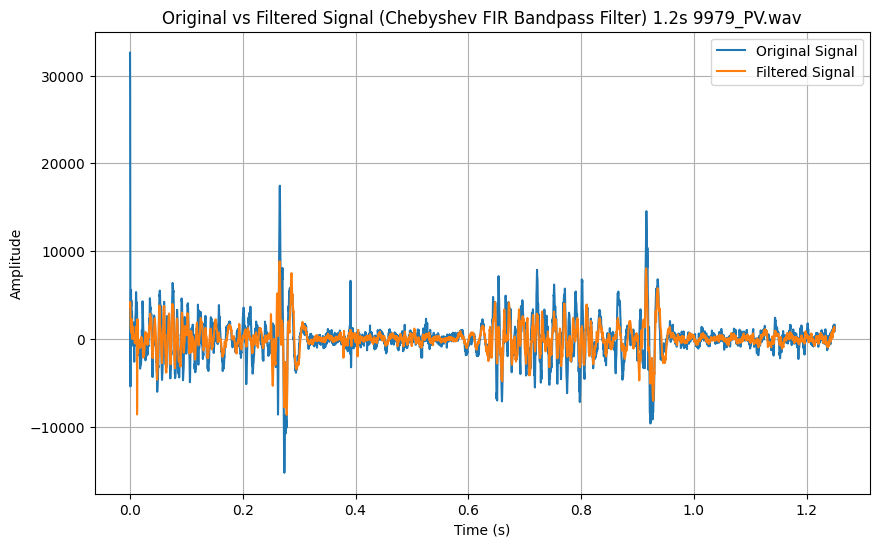

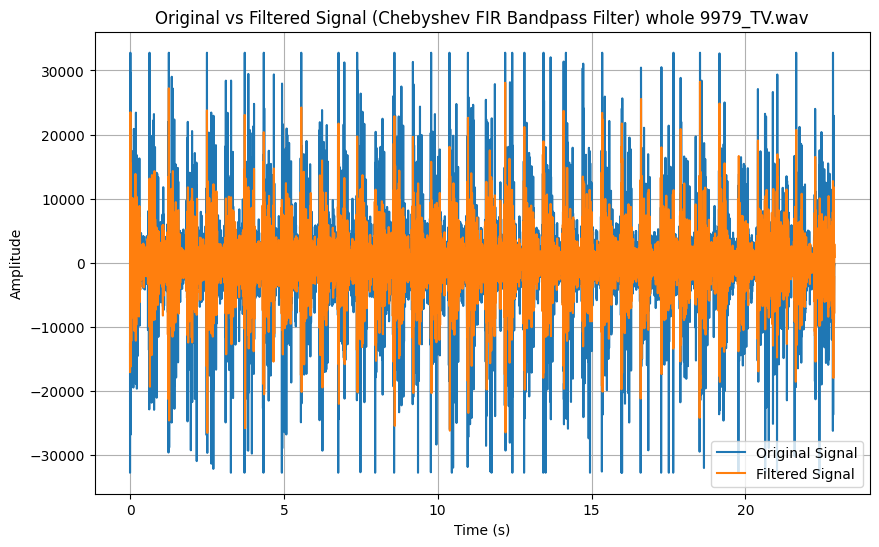

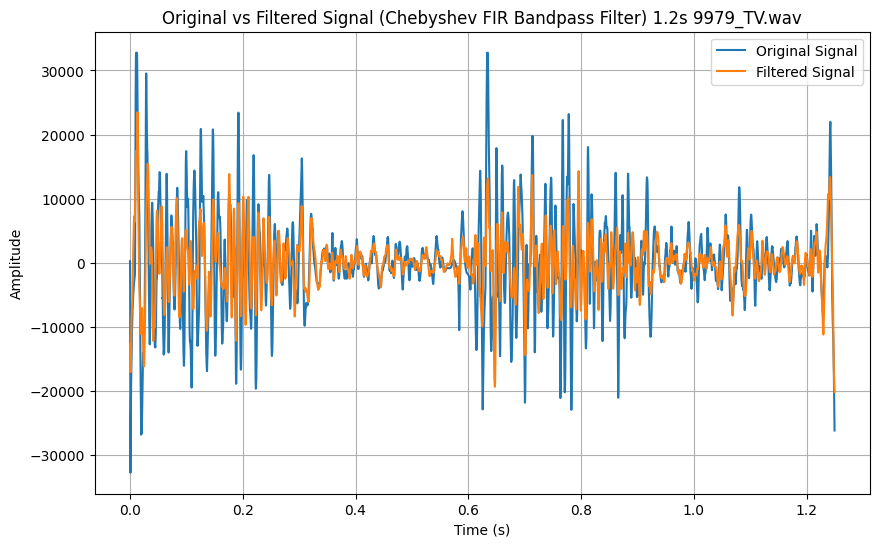

In [6]:
def cheby_fir_bandpass(lowcut, highcut, fs, order=5, rp=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    taps = firwin(order+1, [low, high], pass_zero=False, window=('chebwin', rp))
    return taps

# Filter parameters
lowcut = 4  # Lower cutoff frequency (Hz)
highcut = 400  # Higher cutoff frequency (Hz)
order = 100  # Filter order
rp = 1  # Passband ripple (dB)


for file_name in os.listdir(directory):
        if file_name.endswith(".wav"):
            file_path = os.path.join(directory, file_name)
            with wave.open(file_path, 'rb') as wav_file:
                frames = wav_file.readframes(-1)
                signal = np.frombuffer(frames, dtype='int16')
                sample_rate = wav_file.getframerate()
                taps = cheby_fir_bandpass(lowcut, highcut, sample_rate, order, rp)
                filtered_signal = apply_fir_filter(signal, taps)
                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal)) / sample_rate, signal, label='Original Signal')
                plt.plot(np.arange(len(filtered_signal)) / sample_rate, filtered_signal, label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal (Chebyshev FIR Bandpass Filter) whole '+file_name)
                plt.legend()
                plt.grid(True)
                plt.show()

                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal))[:5000] / sample_rate, signal[:5000], label='Original Signal')
                plt.plot(np.arange(len(filtered_signal))[:5000] / sample_rate, filtered_signal[:5000], label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal (Chebyshev FIR Bandpass Filter) 1.2s '+file_name)
                plt.legend()
                plt.grid(True)
                plt.show()

# Median Filter 

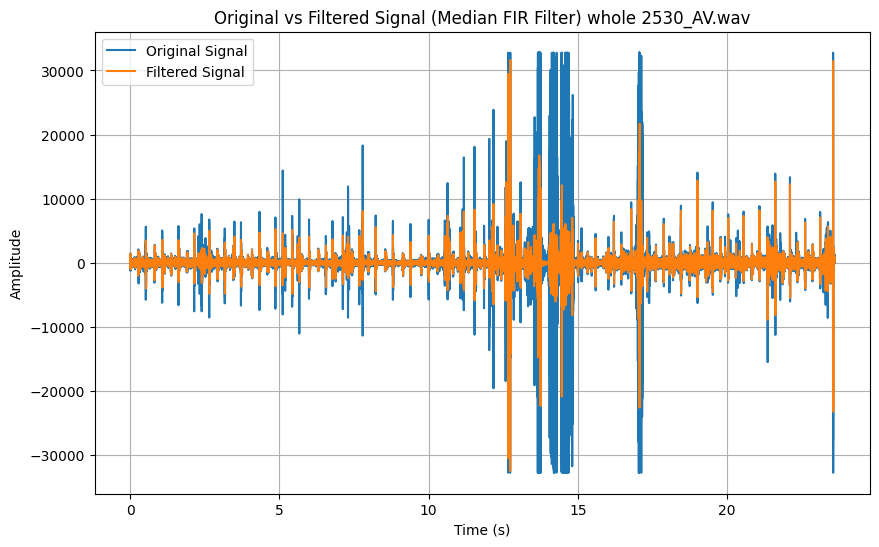

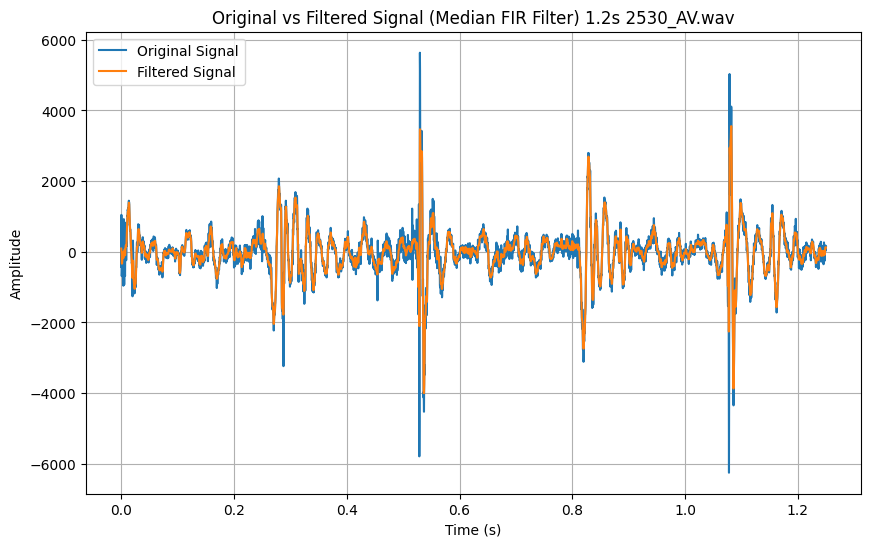

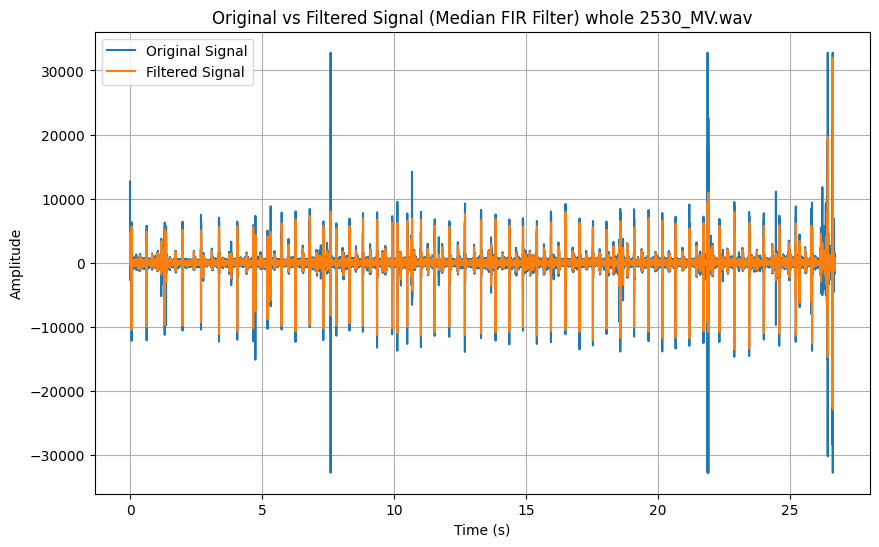

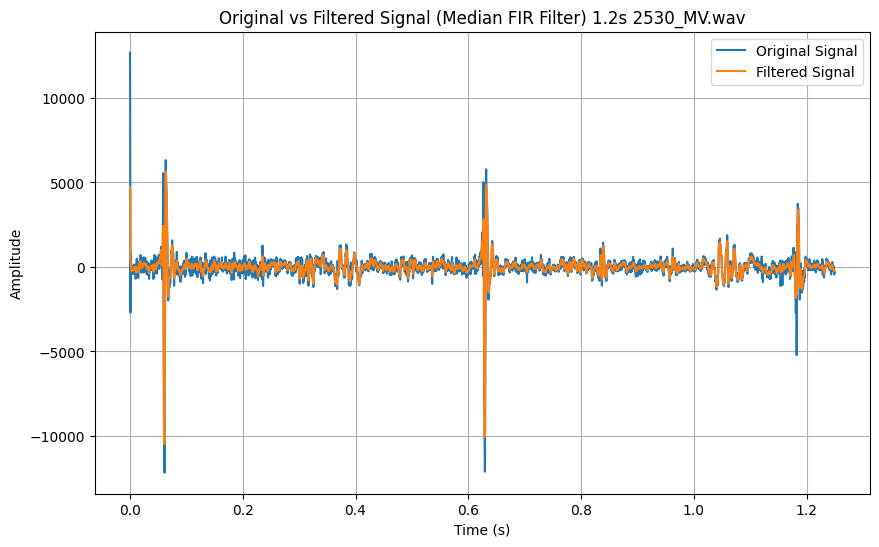

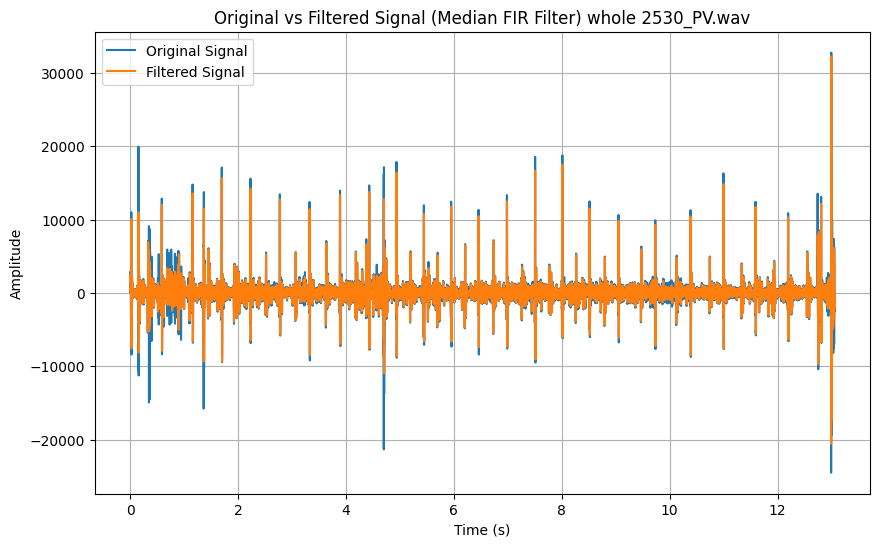

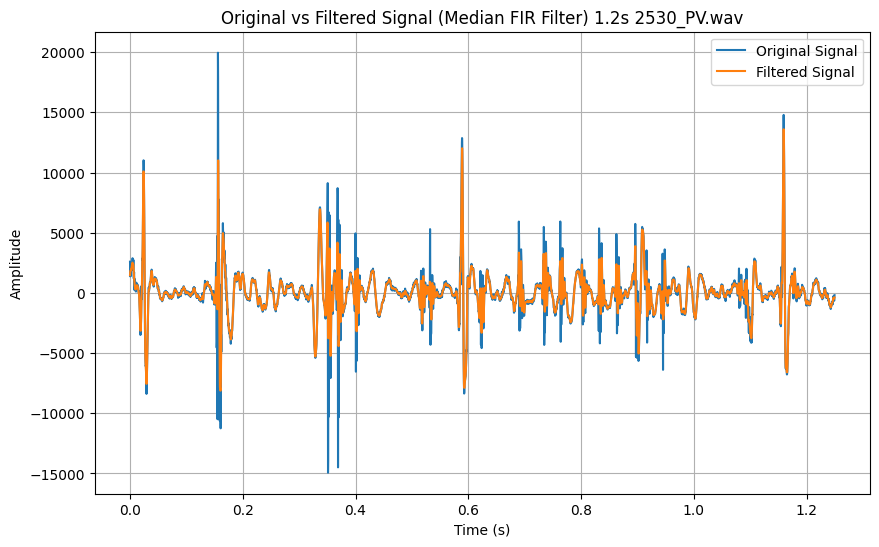

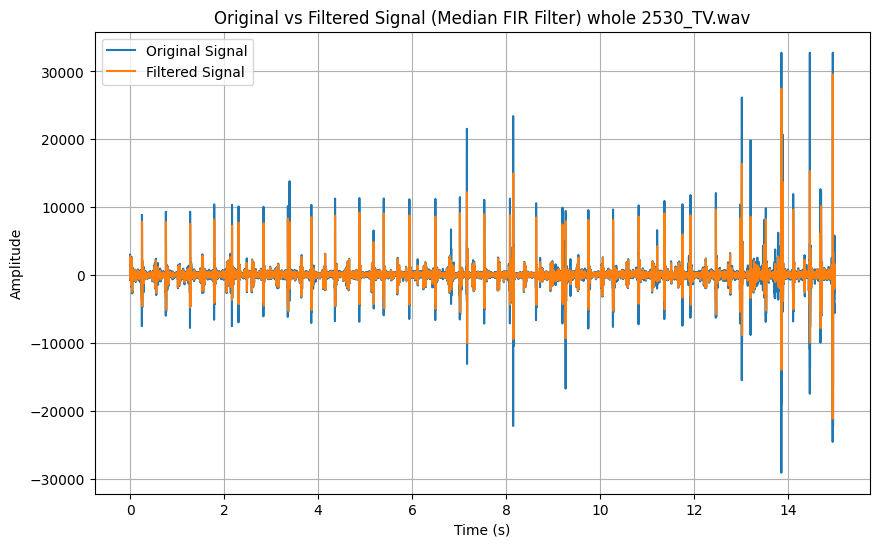

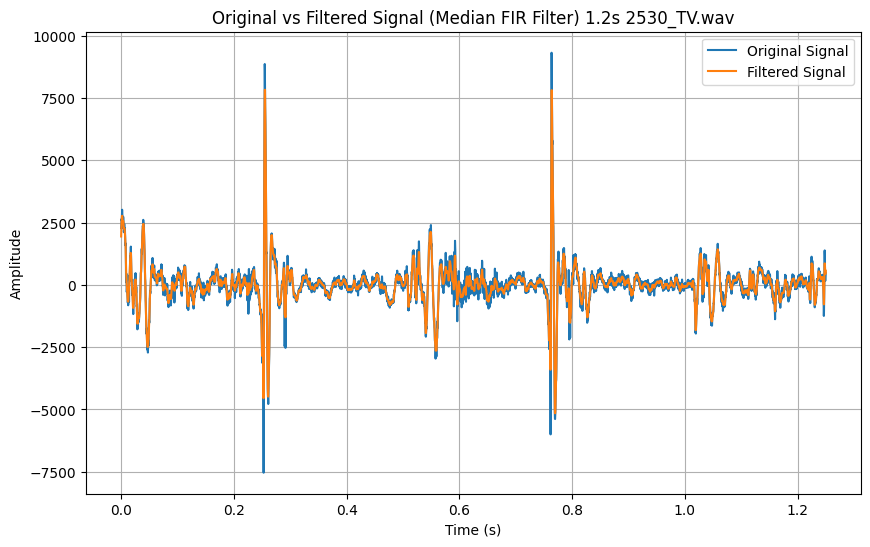

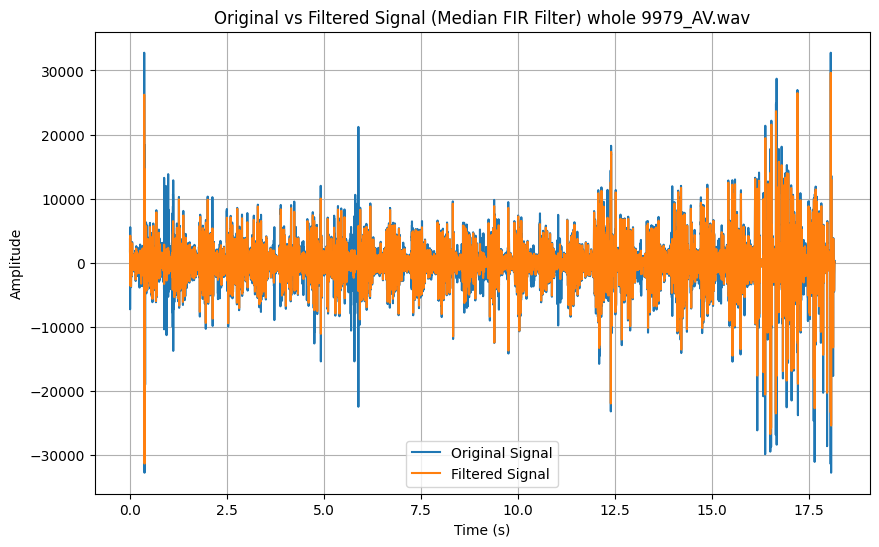

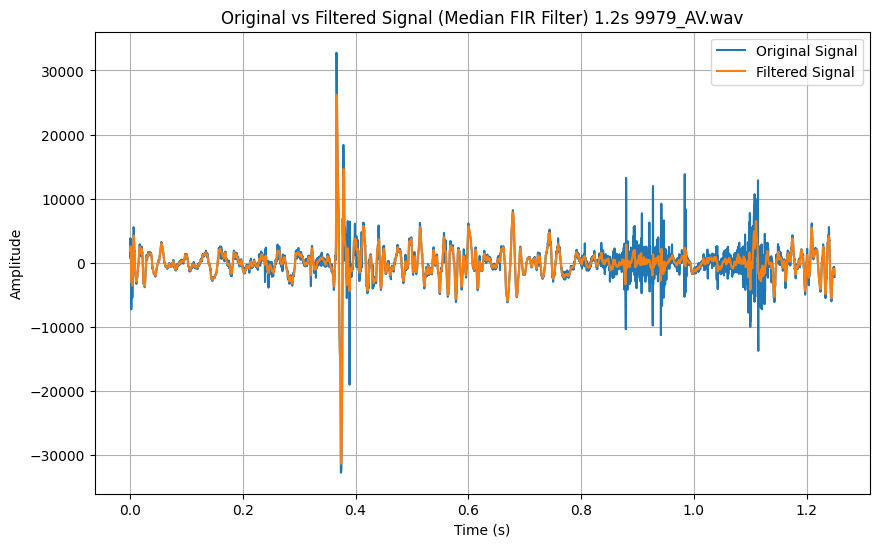

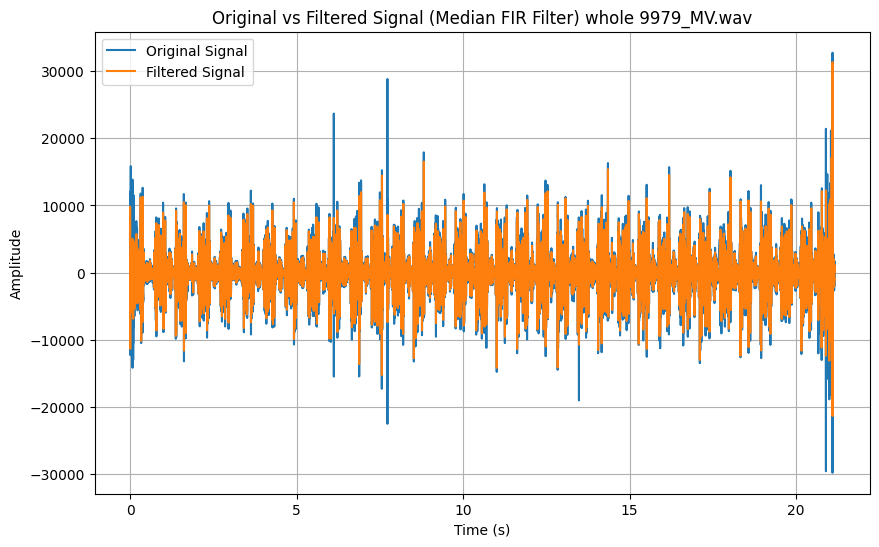

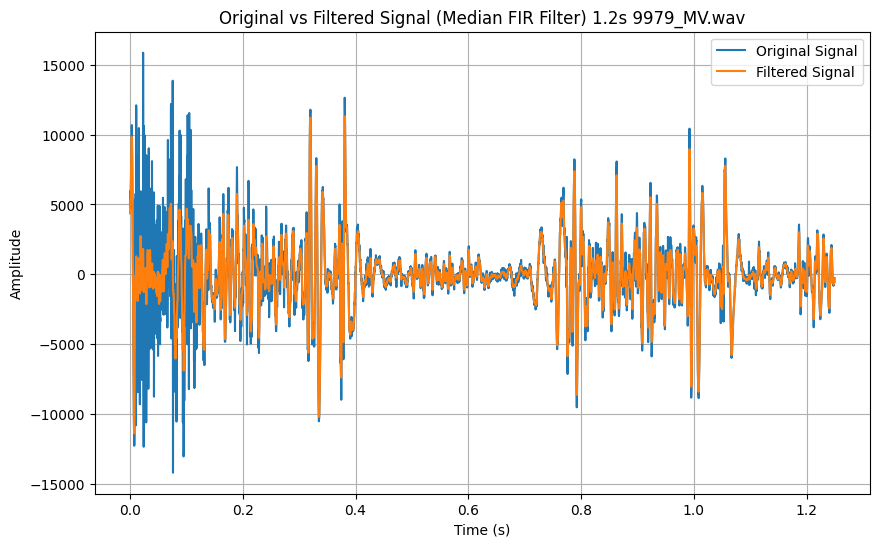

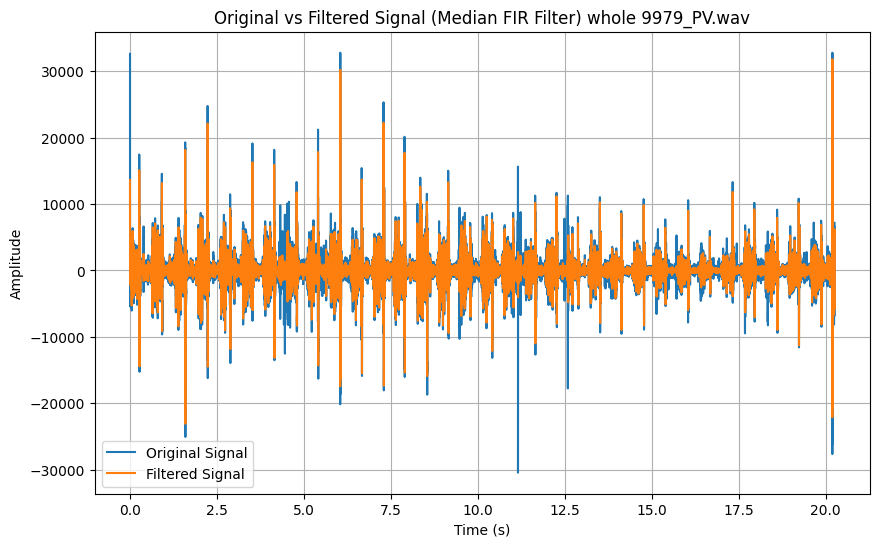

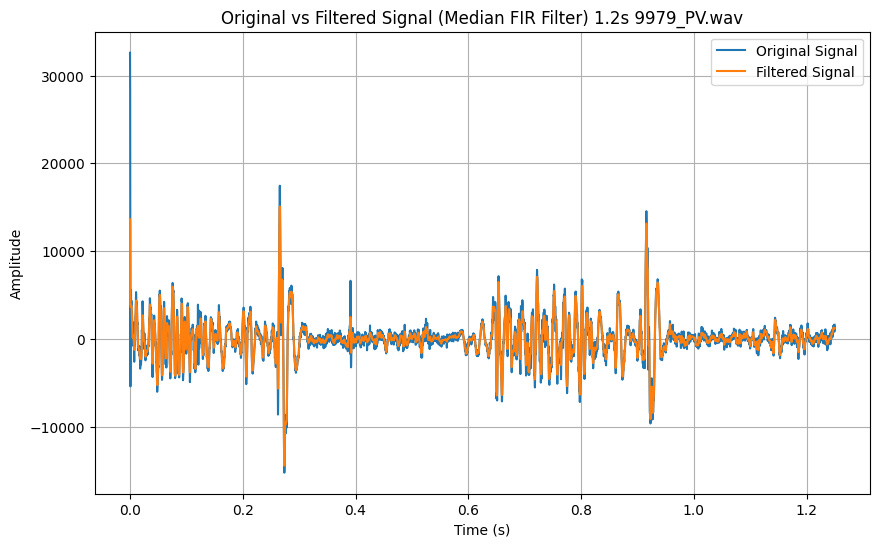

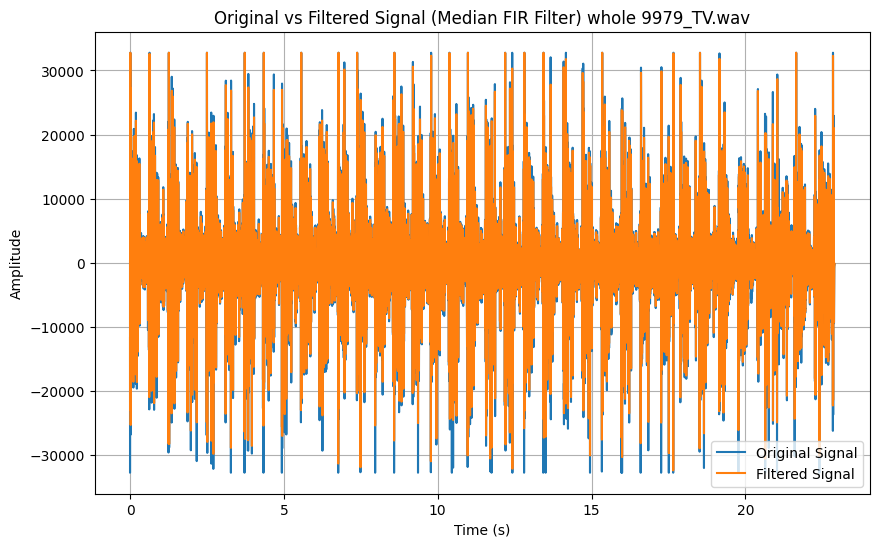

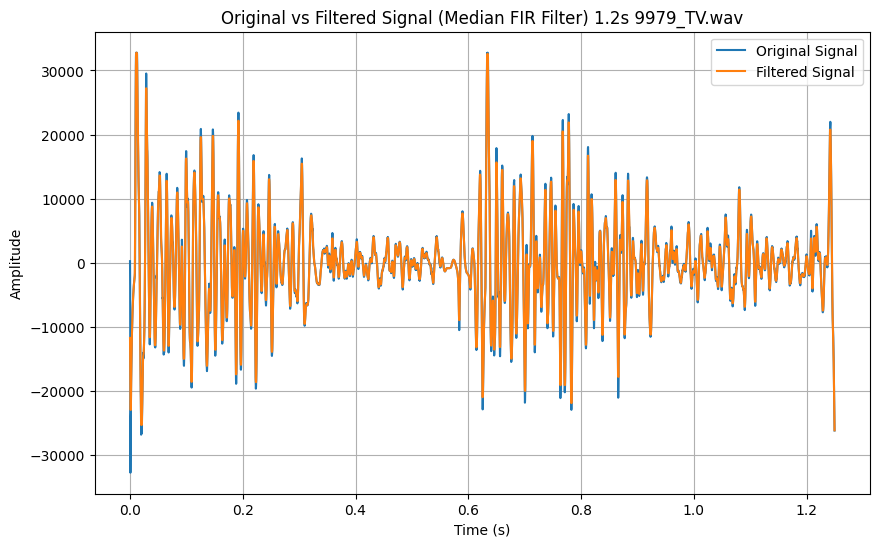

In [7]:
def median_filter_fir(data, window_size):
    # Apply a moving average filter using FIR approach
    kernel = np.ones(window_size) / window_size
    moving_avg = convolve(data, kernel, mode='same')
    
    # Apply non-linear operation to approximate median
    half_window = window_size // 2
    filtered_data = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        window = moving_avg[start:end]
        filtered_data[i] = np.median(window)
    return filtered_data

for file_name in os.listdir(directory):
        if file_name.endswith(".wav"):
            file_path = os.path.join(directory, file_name)
            with wave.open(file_path, 'rb') as wav_file:
                frames = wav_file.readframes(-1)
                signal = np.frombuffer(frames, dtype='int16')
                sample_rate = wav_file.getframerate()
                window_size = 5
                filtered_signal =  median_filter_fir(signal, window_size)
                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal)) / sample_rate, signal, label='Original Signal')
                plt.plot(np.arange(len(filtered_signal)) / sample_rate, filtered_signal, label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal (Median FIR Filter) whole '+ file_name)
                plt.legend()
                plt.grid(True)
                plt.show()

                plt.figure(figsize=(10, 6))
                plt.plot(np.arange(len(signal))[:5000] / sample_rate, signal[:5000], label='Original Signal')
                plt.plot(np.arange(len(filtered_signal))[:5000] / sample_rate, filtered_signal[:5000], label='Filtered Signal')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.title('Original vs Filtered Signal (Median FIR Filter) 1.2s '+ file_name)
                plt.legend()
                plt.grid(True)
                plt.show()